# 1. 设置软件环境

In [ ]:
# if use it in colab, please install it by yourself first
#!pip install git+https://github.com/maxwillzq/algoTrading.git

In [1]:
import algotrading
import matplotlib.pyplot as plt
import pandas as pd
import yahoo_fin.news as sn
import yahoo_fin.stock_info as si
import numpy as np
import datetime as dt
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
def get_next_5_year_growth(stock_name):
    info = si.get_analysts_info(stock_name)['Growth Estimates']
    info = info[info['Growth Estimates'] == "Next 5 Years (per annum)"]
    result = 0.0
    try:
        result = info[stock_name].iloc[0]
        result = algotrading.stock._convert_to_numeric(result)
        result = round(result * 100, 2)
    except: 
        pass
    return result

# 1. 寻找那些好生意的股票

In [3]:
table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df = table[0]
df['Symbol'] = df['Symbol'].apply(lambda str: str.replace('.', '-'))

In [4]:
df["GICS Sector"].unique()

array(['Industrials', 'Health Care', 'Information Technology',
       'Communication Services', 'Consumer Staples',
       'Consumer Discretionary', 'Utilities', 'Financials', 'Materials',
       'Real Estate', 'Energy'], dtype=object)

In [5]:
section_df = df[df["GICS Sector"] == "Industrials"]
section_df = section_df.set_index('Symbol')

In [6]:
for name in section_df.index:
    section_df.loc[name, "growth"] = get_next_5_year_growth(name)

In [7]:
section_df.sort_values(["growth"], ascending=False,inplace=True)

In [8]:
section_df

,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded,growth
Symbol,,,,,,,,,
EMR,Emerson,reports,Industrials,Electrical Components & Equipment,"Ferguson, Missouri",1965-03-31,32604,1890,9.97%
ROK,Rockwell Automation,reports,Industrials,Electrical Components & Equipment,"Milwaukee, Wisconsin",NaN,1024478,1903,9.27%
VRSK,Verisk,reports,Industrials,Research & Consulting Services,"Jersey City, New Jersey",2015-10-08,1442145,1971,9.20%
OTIS,Otis,reports,Industrials,Industrial Machinery,"Farmington, Connecticut",2020-04-03,1781335,2020 (1853),9.20%
ALLE,Allegion,reports,Industrials,Building Products,"New York City, New York",2013-12-02,1579241,1908,8.87%
...,...,...,...,...,...,...,...,...,...
LUV,Southwest Airlines,reports,Industrials,Airlines,"Dallas, Texas",1994-07-01,92380,1967,-21.00%
EXPD,Expeditors,reports,Industrials,Air Freight & Logistics,"Seattle, Washington",2007-10-10,746515,1979,-17.80%
UAL,United Airlines,reports,Industrials,Airlines,"Chicago, Illinois",2015-09-03,100517,1967,-129.10%


In [9]:
symbols = ['ADBE', 'BABA', 'FB', 'COST', 'CRM', 'QCOM', 'AMD', 'TSM', 'ASML', 'AMZN', 'AAPL', 'GOOG', 'NFLX', 'MSFT', 'QQQ', 'SPY', 'TTD', 'PDD', 'JD', 'SQ', 'TSLA', 'NVDA', 'LMT', 'DXCM', 'ETSY', 'TFC', 'VRTX', 'HOLX']

def get_prices(symbols):
    end = dt.datetime.now()
    start =  end - dt.timedelta(2000)
    result_dict = {}
    for symbol in symbols:
        st = algotrading.stock.Stock(symbol)
        st.read_data()
        st.read_data(days=1000)
        st.generate_more_data()
        if len(st.df) > 500:
            result_dict[symbol] = st.df['Close']
    prices = pd.DataFrame(result_dict, columns=symbols, dtype=float)
    prices.dropna(inplace=True)
    return prices

prices = get_prices(symbols)
prices_norm = {}
for symbol in symbols:
    prices_norm[symbol] = prices[symbol]/prices[symbol][0]

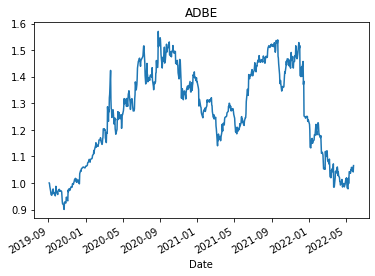

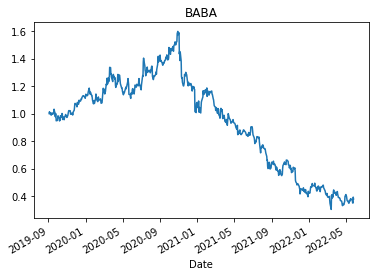

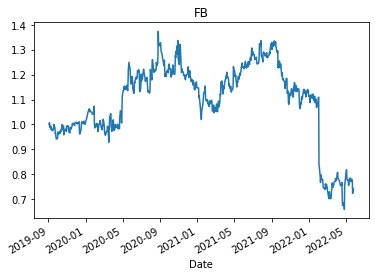

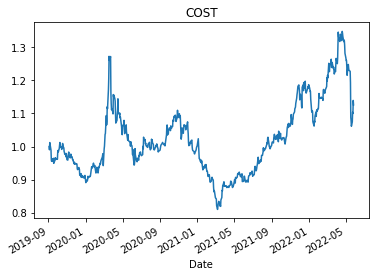

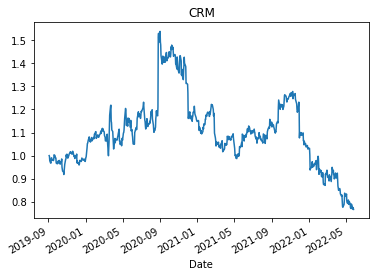

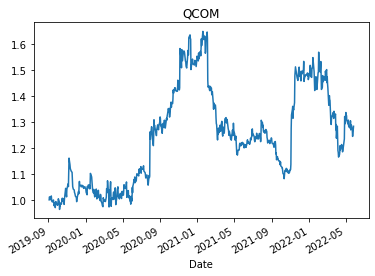

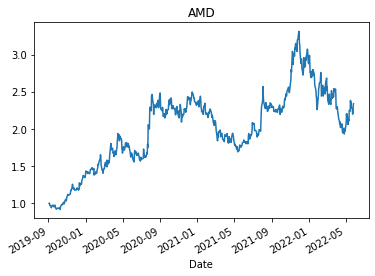

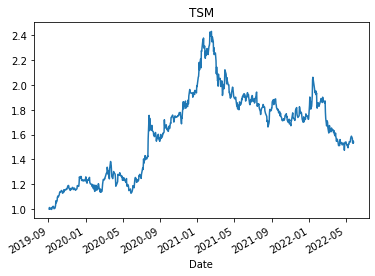

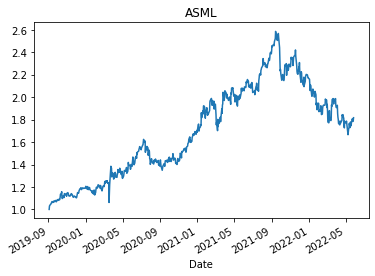

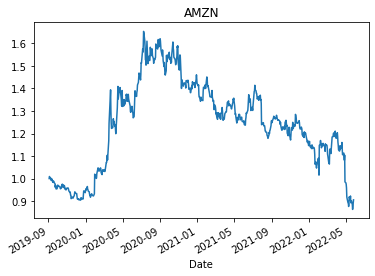

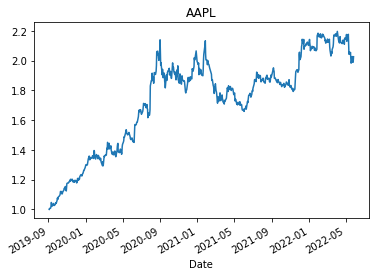

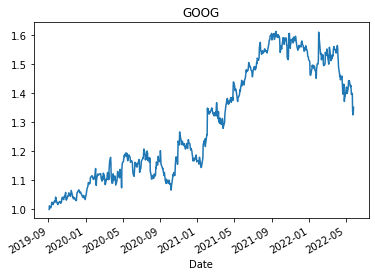

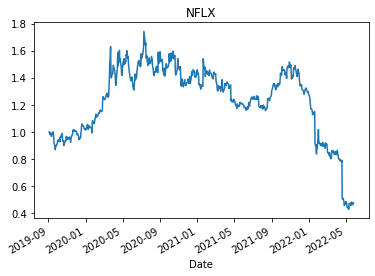

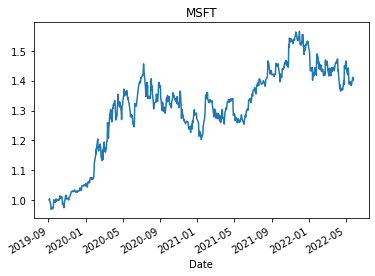

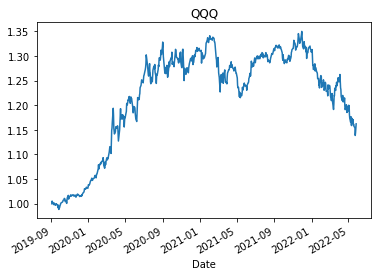

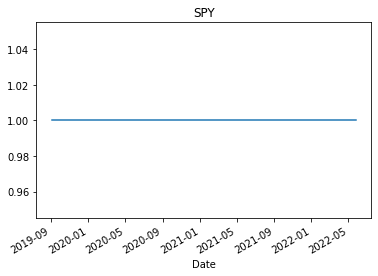

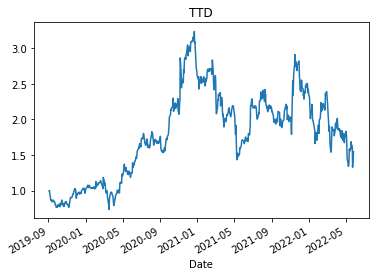

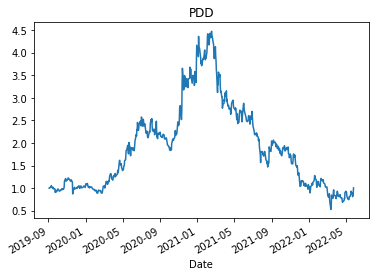

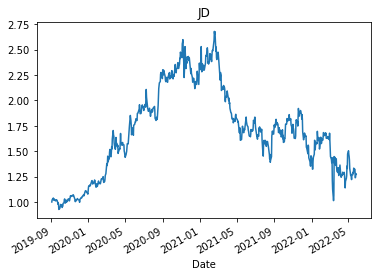

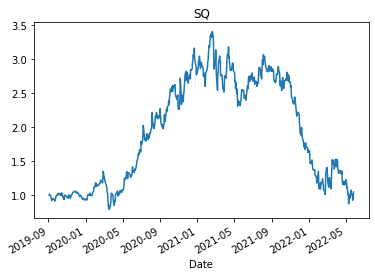

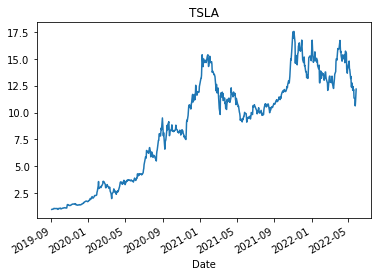

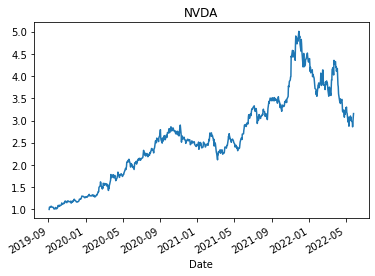

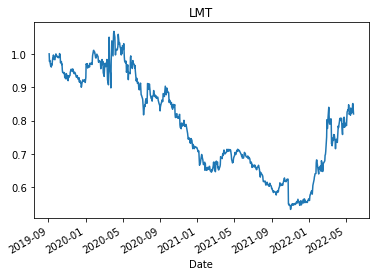

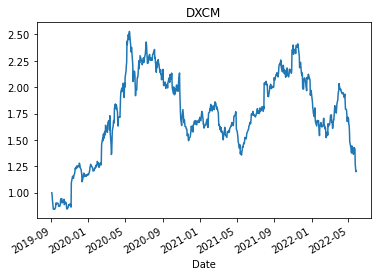

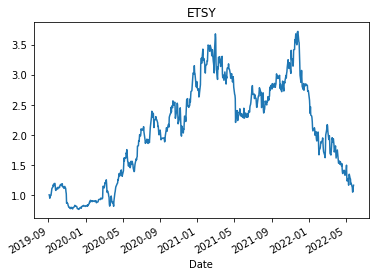

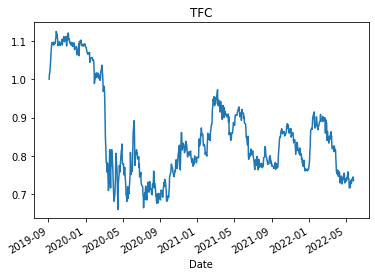

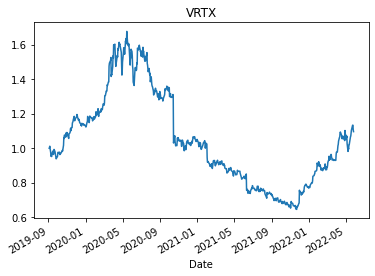

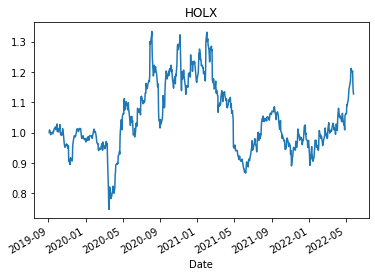

In [10]:
prices_norm = prices.copy()
for symbol in symbols:
    prices_norm[symbol] = prices[symbol]/prices[symbol][0]
for symbol in symbols:
    (prices_norm[symbol]/prices_norm.SPY).plot(title=symbol)
    plt.show()

In [12]:
sp_list = si.tickers_sp500()
result = {}
good_business = []
for name in sp_list:
    st = algotrading.stock.Stock(name)
    status, messages, result_dict = st.is_good_business()
    #print(f"{st.name} is a good business? \nAnswer: {status}")
    if status == False:
        #print("Reason:", messages)
        pass
    else:
        good_business.append(name)
        result[name] = result_dict

In [ ]:
df = pd.DataFrame.from_dict(result, orient='index')
df.keys()

In [ ]:
df[['Return on Equity (ttm)']].sort_values(['Return on Equity (ttm)'], ascending=False)